In [1]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("fred_quarterly.csv")

In [4]:
data.head()

,date,month,quarter,Target,gnp,gdpdef,gdp
0,1/1/2000,2000-01,2000Q1,12935.252,10035.263,77.325,10002.179
1,4/1/2000,2000-04,2000Q2,13170.749,10283.391,77.807,10247.720
2,7/1/2000,2000-07,2000Q3,13183.890,10348.645,78.263,10318.165
3,10/1/2000,2000-10,2000Q4,13262.250,10490.430,78.688,10435.744
4,1/1/2001,2001-01,2001Q1,13219.251,10510.297,79.204,10470.231


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     86 non-null     object 
 1   month    86 non-null     object 
 2   quarter  86 non-null     object 
 3   Target   86 non-null     float64
 4   gnp      85 non-null     float64
 5   gdpdef   86 non-null     float64
 6   gdp      86 non-null     float64
dtypes: float64(4), object(3)
memory usage: 4.8+ KB


In [6]:
data.describe()

,Target,gnp,gdpdef,gdp
count,86.000000,85.000000,86.000000,86.000000
mean,16043.371291,15788.494200,96.672000,15705.747209
std,1809.872040,3545.817776,11.154457,3528.301498
min,12935.252000,10035.263000,77.325000,10002.179000
25%,14868.853000,12996.998000,87.280000,12977.652500
50%,15781.342000,15339.711000,96.564000,15225.538000
75%,17456.204250,18565.145000,104.986500,18401.999250
max,19358.176000,22273.060000,117.380000,22722.581000


In [7]:
data.isnull().sum()

date       0
month      0
quarter    0
Target     0
gnp        1
gdpdef     0
gdp        0
dtype: int64

In [8]:
data['gnp'].fillna(data['gnp'].mean(),inplace=True)

In [9]:
data.isnull().sum()

date       0
month      0
quarter    0
Target     0
gnp        0
gdpdef     0
gdp        0
dtype: int64

In [10]:
data = data.drop(columns = "date")

In [11]:
data.head()

,month,quarter,Target,gnp,gdpdef,gdp
0,2000-01,2000Q1,12935.252,10035.263,77.325,10002.179
1,2000-04,2000Q2,13170.749,10283.391,77.807,10247.720
2,2000-07,2000Q3,13183.890,10348.645,78.263,10318.165
3,2000-10,2000Q4,13262.250,10490.430,78.688,10435.744
4,2001-01,2001Q1,13219.251,10510.297,79.204,10470.231


In [12]:
data['year'] = data['month'].str.split("-").str[0]
data['month'] = data['month'].str.split("-").str[1]

In [13]:
data.head()

,month,quarter,Target,gnp,gdpdef,gdp,year
0,01,2000Q1,12935.252,10035.263,77.325,10002.179,2000
1,04,2000Q2,13170.749,10283.391,77.807,10247.720,2000
2,07,2000Q3,13183.890,10348.645,78.263,10318.165,2000
3,10,2000Q4,13262.250,10490.430,78.688,10435.744,2000
4,01,2001Q1,13219.251,10510.297,79.204,10470.231,2001


In [14]:
for i in range(86):
    x = data['year'][i]
    data['quarter'][i] = data['quarter'][i].split(x+"Q")
    data['quarter'][i]=data['quarter'][i][1]

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
data.head()

,month,quarter,Target,gnp,gdpdef,gdp,year
0,01,1,12935.252,10035.263,77.325,10002.179,2000
1,04,2,13170.749,10283.391,77.807,10247.720,2000
2,07,3,13183.890,10348.645,78.263,10318.165,2000
3,10,4,13262.250,10490.430,78.688,10435.744,2000
4,01,1,13219.251,10510.297,79.204,10470.231,2001


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    86 non-null     object 
 1   quarter  86 non-null     object 
 2   Target   86 non-null     float64
 3   gnp      86 non-null     float64
 4   gdpdef   86 non-null     float64
 5   gdp      86 non-null     float64
 6   year     86 non-null     object 
dtypes: float64(4), object(3)
memory usage: 4.8+ KB


In [17]:
data['quarter'] = data['quarter'].astype(int)
data['month'] = data['month'].astype(int)
data['year'] = data['year'].astype(int)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    86 non-null     int64  
 1   quarter  86 non-null     int64  
 2   Target   86 non-null     float64
 3   gnp      86 non-null     float64
 4   gdpdef   86 non-null     float64
 5   gdp      86 non-null     float64
 6   year     86 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.8 KB


In [21]:
data.head()

,month,quarter,Target,gnp,gdpdef,gdp,year
0,1,1,12935.252,10035.263,77.325,10002.179,2000
1,4,2,13170.749,10283.391,77.807,10247.720,2000
2,7,3,13183.890,10348.645,78.263,10318.165,2000
3,10,4,13262.250,10490.430,78.688,10435.744,2000
4,1,1,13219.251,10510.297,79.204,10470.231,2001


In [19]:
from pycaret.regression import *

In [24]:
reg = setup(data,target="Target",numeric_features=['month','quarter'])

,Description,Value
0,session_id,3002
1,Target,Target
2,Original Data,"(86, 7)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(60, 4)"


In [25]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,148.2048,31687.5188,170.3993,0.9824,0.0108,0.0094,0.0090
llar,Lasso Least Angle Regression,150.0884,32483.3112,172.7480,0.9820,0.0110,0.0095,0.0090
br,Bayesian Ridge,155.0060,38604.0055,183.0901,0.9802,0.0114,0.0098,0.0110
dt,Decision Tree Regressor,183.2494,56029.2314,222.8260,0.9735,0.0135,0.0112,0.0110
knn,K Neighbors Regressor,153.5440,76629.0483,209.0168,0.9692,0.0124,0.0092,0.0110
et,Extra Trees Regressor,128.5069,99900.4396,204.0798,0.9595,0.0118,0.0075,0.1510
rf,Random Forest Regressor,163.5415,108051.9297,241.9541,0.9559,0.0142,0.0097,0.1840
gbr,Gradient Boosting Regressor,171.3893,126358.6569,254.5261,0.9507,0.0149,0.0101,0.0480
en,Elastic Net,168.7491,172546.8253,258.6655,0.9392,0.0158,0.0103,0.0130
ridge,Ridge Regression,172.9665,177555.0966,262.1661,0.9377,0.0160,0.0106,0.0110


In [27]:
model = create_model("omp")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,144.4755,24690.6570,157.1326,0.9941,0.0094,0.0087
1,115.9433,16881.3405,129.9282,0.9939,0.0084,0.0074
2,157.7704,28784.3239,169.6594,0.9785,0.0122,0.0113
3,112.6669,15939.8775,126.2532,0.9876,0.0075,0.0067
4,116.3277,18200.8733,134.9106,0.9887,0.0097,0.0082
5,191.1757,37956.5666,194.8245,0.9879,0.0114,0.0110
6,154.9696,26730.5534,163.4948,0.9921,0.0105,0.0099
7,216.6531,97712.2448,312.5896,0.9330,0.0181,0.0131
8,154.0243,28870.7202,169.9139,0.9772,0.0115,0.0105
9,118.0416,21108.0314,145.2860,0.9913,0.0092,0.0073


In [28]:
tuned_omp = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,144.4755,24690.6570,157.1326,0.9941,0.0094,0.0087
1,115.9433,16881.3405,129.9282,0.9939,0.0084,0.0074
2,157.7704,28784.3239,169.6594,0.9785,0.0122,0.0113
3,112.6669,15939.8775,126.2532,0.9876,0.0075,0.0067
4,116.3277,18200.8733,134.9106,0.9887,0.0097,0.0082
5,191.1757,37956.5666,194.8245,0.9879,0.0114,0.0110
6,154.9696,26730.5534,163.4948,0.9921,0.0105,0.0099
7,216.6531,97712.2448,312.5896,0.9330,0.0181,0.0131
8,154.0243,28870.7202,169.9139,0.9772,0.0115,0.0105
9,118.0416,21108.0314,145.2860,0.9913,0.0092,0.0073


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


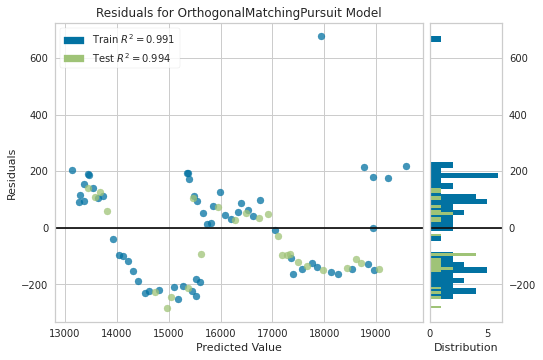

In [29]:
plot_model(tuned_omp)

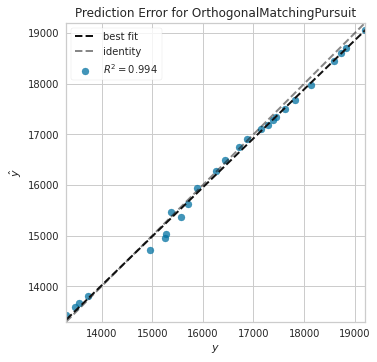

In [30]:
plot_model(tuned_omp,plot="error")

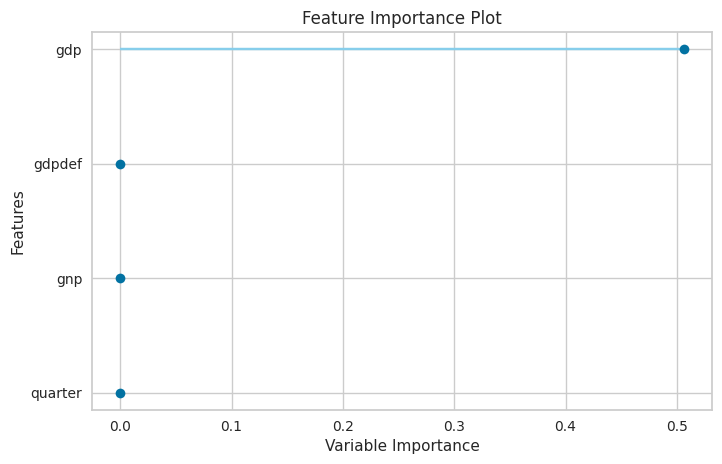

In [31]:
plot_model(tuned_omp,plot="feature")

In [32]:
predict_model(tuned_omp)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,118.4320,18210.6912,134.9470,0.9937,0.0086,0.0074


,quarter,gnp,gdpdef,gdp,Target,Label
0,2.0,10918.383789,80.782997,10887.459961,13477.356445,13586.058461
1,2.0,13802.876953,90.000000,13753.423828,15281.525391,15037.019403
2,3.0,19864.058594,107.903000,19558.693359,18126.226562,17976.072279
3,2.0,10647.426758,79.682999,10599.000000,13301.393555,13440.018889
4,4.0,18075.378906,104.150002,17852.539062,17141.234375,17112.291939
5,4.0,17368.794922,102.514999,17133.113281,16712.759766,16748.065885
6,2.0,15780.005859,97.988998,15557.535156,15876.838867,15950.392772
7,1.0,18214.218750,104.112999,17991.347656,17280.646484,17182.567021
8,4.0,21101.076172,111.175003,20813.324219,18721.281250,18611.258366
9,4.0,11120.565430,81.638000,11061.432617,13549.420898,13674.136169


In [33]:
save_model(tuned_omp,"Regression Model using PyCaret")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['month', 'quarter'],
                                       target='Target', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,...
                 ('dummy', Dummify(target='Target')),
                 ('fix_perfect', Remove_100(target='Target')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_